<a href="https://colab.research.google.com/github/srujayreddyv/CSC177-P3-ClassificationModelsProject/blob/main/CSC177_P3_ClassificationOnOwnDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC177- Project 3 Part B
# Classification Models Project (Fall 2023)

## Team Challengers (23):
  1. Srujay Reddy Vangoor
  2. Vaibhav Jain
  3. Bashar Allwza
  4. Varun Bailapudi
  5. Uddayankith Chodagam

## Loading the dataset

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [3]:
df = pd.read_csv('data.csv')

In [4]:
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


## Converting output into categorical features

In [5]:
for i in range(19735):
    if(df['Appliances'][i]>=60):
        df['Appliances'][i]="High"
    else:
        df['Appliances'][i]="Low"

<ipython-input-5-3c8d7dc2cd19>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Appliances'][i]="High"


In [6]:
df['Appliances'].unique()

array(['High', 'Low'], dtype=object)

## Checking for null values

In [7]:
df.isna().values.any()

False

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  object 
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

## Heat map for co-relation

<Axes: >

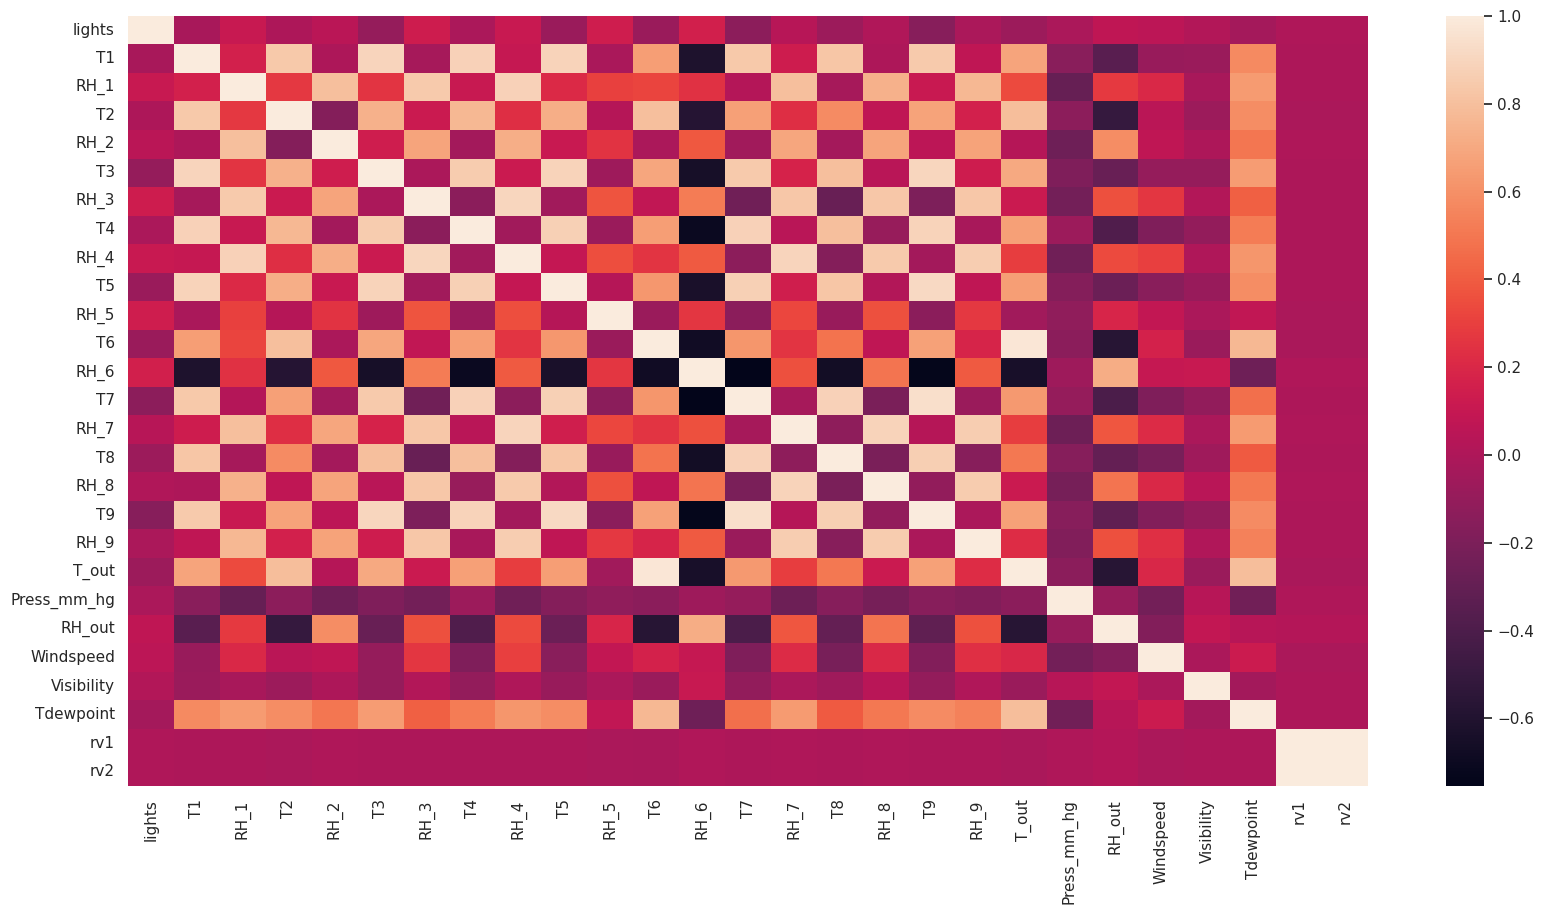

In [9]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(df.corr(numeric_only=True))

## Checking for duplicate rows

In [10]:
dups = df.duplicated()
print('Numbecr of duplicate rows = %d' % (dups.sum()))

Numbecr of duplicate rows = 0


## Dropping columns with low co-realtion

In [11]:
data=df.drop(['lights','date'],axis=1)

## Boxplot for outliers

<Axes: >

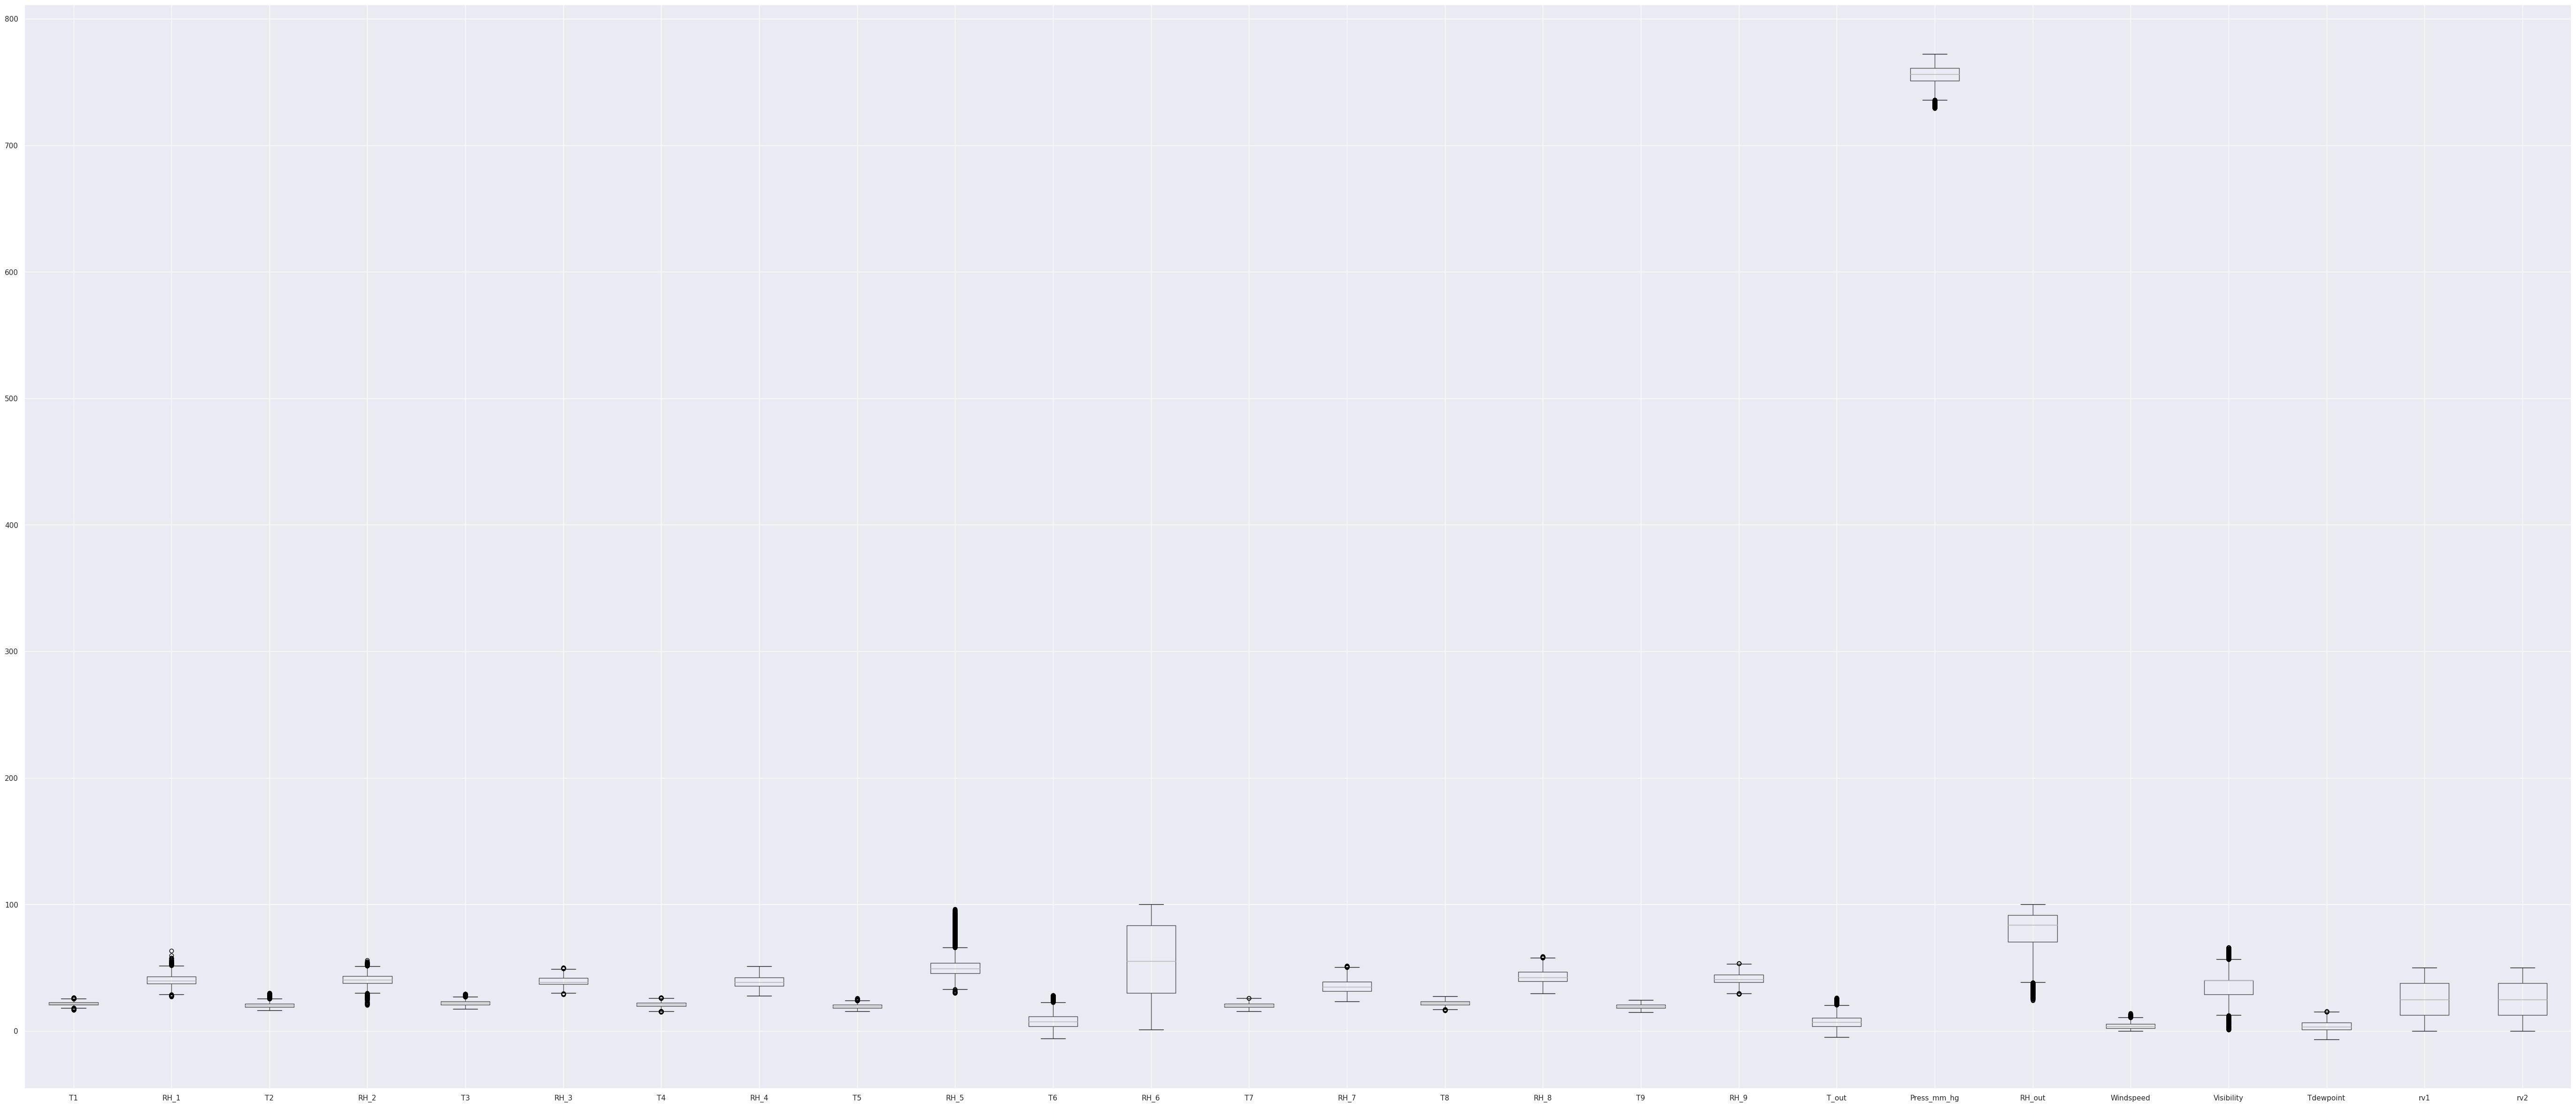

In [12]:
data.boxplot(figsize=(70,30))

## Shuffling rows

In [13]:
data = data.reindex(np.random.permutation(data.index))
data.reset_index(inplace=True, drop=True)
data

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,High,23.000000,41.466667,21.26,42.590000,23.000000,39.500000,20.100000,41.500000,20.790000,...,19.890000,41.790000,13.500000,746.500000,60.000000,8.000000,40.000000,5.800000,11.471415,11.471415
1,Low,21.500000,39.700000,22.50,37.126667,22.000000,37.200000,22.000000,37.184286,19.890000,...,20.290000,39.230000,11.150000,765.500000,71.000000,1.000000,34.500000,5.950000,46.772545,46.772545
2,Low,21.500000,37.200000,19.10,38.560000,22.566667,36.290000,22.185714,34.090000,20.290000,...,20.200000,36.060000,6.266667,763.700000,72.666667,2.000000,40.000000,1.700000,45.085477,45.085477
3,High,21.890000,40.590000,19.60,42.530000,22.890000,38.900000,21.600000,40.260000,20.100000,...,20.290000,39.500000,9.750000,750.033333,80.166667,7.666667,40.000000,6.383333,49.829665,49.829665
4,Low,18.790000,45.826667,18.10,45.260000,19.790000,44.626667,16.463333,47.260000,16.700000,...,16.500000,49.700000,8.583333,753.550000,89.333333,12.000000,37.333333,6.933333,10.201562,10.201562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,Low,21.823333,38.500000,19.60,40.223333,22.500000,37.790000,21.033333,37.826667,20.100000,...,20.600000,39.963333,7.033333,754.000000,75.000000,4.000000,40.000000,2.933333,17.962602,17.962602
19731,High,20.100000,39.163333,18.00,40.560000,20.600000,38.845000,19.500000,36.466667,18.463333,...,18.157143,40.491429,-0.233333,759.933333,98.666667,1.000000,39.000000,-0.333333,24.553593,24.553593
19732,High,21.500000,40.900000,20.00,40.500000,20.890000,40.933333,19.290000,39.800000,17.867778,...,17.790000,38.500000,3.216667,739.766667,90.666667,3.833333,64.000000,1.850000,9.989317,9.989317
19733,Low,21.100000,39.200000,19.50,40.790000,21.890000,37.500000,20.700000,36.290000,19.290000,...,19.390000,38.000000,9.483333,756.183333,63.500000,4.000000,63.833333,2.883333,33.681264,33.681264


## Input and Output Variables

In [14]:
X=data.drop(['Appliances'],axis=1)

In [15]:
Y=data['Appliances']

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
x= scaler.fit_transform(X)

## Splitting the data

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,Y,train_size=.7,random_state=8)

## SVC

              precision    recall  f1-score   support

        High       0.78      0.87      0.82      3687
         Low       0.73      0.59      0.65      2234

    accuracy                           0.76      5921
   macro avg       0.75      0.73      0.74      5921
weighted avg       0.76      0.76      0.76      5921



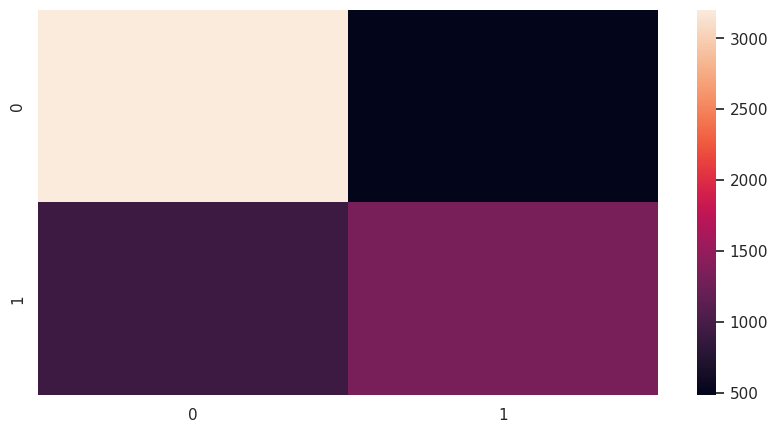

In [18]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix , classification_report

model=SVC()

model.fit(x_train,y_train)

y_pred=model.predict(x_test)

cnf=confusion_matrix(y_test, y_pred)
cnf

sns.set(rc = {'figure.figsize':(10,5)})
sns.heatmap(cnf)

print(classification_report(y_test,y_pred))

## KNN

              precision    recall  f1-score   support

        High       0.82      0.81      0.82      3687
         Low       0.70      0.71      0.70      2234

    accuracy                           0.77      5921
   macro avg       0.76      0.76      0.76      5921
weighted avg       0.77      0.77      0.77      5921



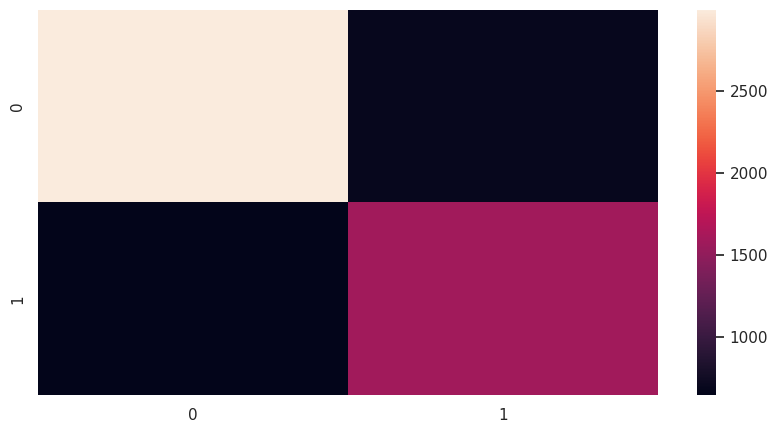

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix , classification_report

neigh = KNeighborsClassifier(n_neighbors = 5)

neigh.fit(x_train,y_train)

y_pred_neigh=neigh.predict(x_test)

cnf_neigh=confusion_matrix(y_test, y_pred_neigh)
cnf_neigh

sns.heatmap(cnf_neigh)

print(classification_report(y_test,y_pred_neigh))

In [20]:
neigh = KNeighborsClassifier(n_neighbors = 4)
neigh.fit(x_train,y_train)
y_pred_neigh=neigh.predict(x_test)
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred_neigh))

              precision    recall  f1-score   support

        High       0.78      0.88      0.83      3687
         Low       0.75      0.60      0.67      2234

    accuracy                           0.77      5921
   macro avg       0.77      0.74      0.75      5921
weighted avg       0.77      0.77      0.77      5921



In [21]:
neigh = KNeighborsClassifier(n_neighbors = 3)
neigh.fit(x_train,y_train)
y_pred_neigh=neigh.predict(x_test)
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred_neigh))

              precision    recall  f1-score   support

        High       0.82      0.81      0.82      3687
         Low       0.70      0.71      0.70      2234

    accuracy                           0.77      5921
   macro avg       0.76      0.76      0.76      5921
weighted avg       0.78      0.77      0.77      5921



In [22]:
neigh = KNeighborsClassifier(n_neighbors = 2)
neigh.fit(x_train,y_train)
y_pred_neigh=neigh.predict(x_test)
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred_neigh))

              precision    recall  f1-score   support

        High       0.75      0.90      0.82      3687
         Low       0.76      0.51      0.61      2234

    accuracy                           0.75      5921
   macro avg       0.76      0.71      0.72      5921
weighted avg       0.76      0.75      0.74      5921



In [23]:
neigh = KNeighborsClassifier(n_neighbors = 1)
neigh.fit(x_train,y_train)
y_pred_neigh=neigh.predict(x_test)
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred_neigh))

              precision    recall  f1-score   support

        High       0.81      0.80      0.81      3687
         Low       0.68      0.69      0.68      2234

    accuracy                           0.76      5921
   macro avg       0.74      0.75      0.75      5921
weighted avg       0.76      0.76      0.76      5921



## Naive bayes

              precision    recall  f1-score   support

        High       0.75      0.56      0.65      3687
         Low       0.49      0.70      0.58      2234

    accuracy                           0.61      5921
   macro avg       0.62      0.63      0.61      5921
weighted avg       0.66      0.61      0.62      5921



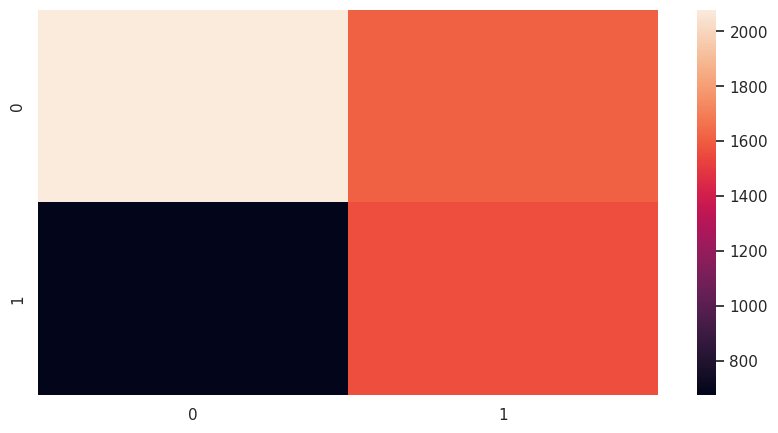

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix , classification_report

model = GaussianNB()

model.fit(x_train,y_train)

y_pred=model.predict(x_test)

cnf=confusion_matrix(y_test, y_pred)
cnf

sns.set(rc = {'figure.figsize':(10,5)})
sns.heatmap(cnf)

print(classification_report(y_test,y_pred))

## Decision Tree

              precision    recall  f1-score   support

        High       0.83      0.83      0.83      3687
         Low       0.72      0.72      0.72      2234

    accuracy                           0.79      5921
   macro avg       0.78      0.78      0.78      5921
weighted avg       0.79      0.79      0.79      5921



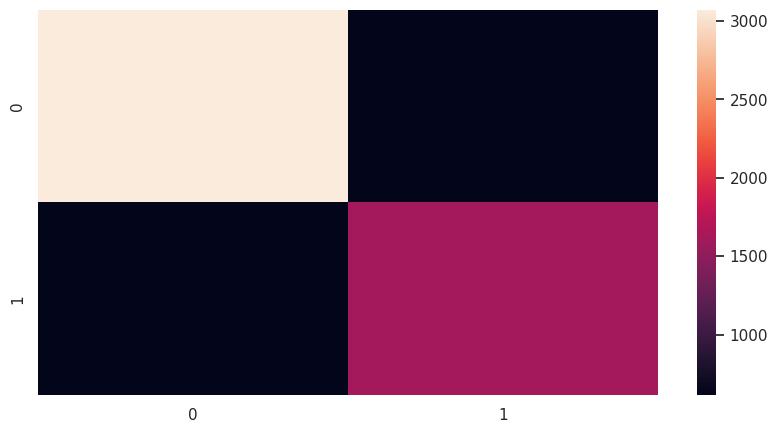

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix , classification_report

model = DecisionTreeClassifier()

model.fit(x_train,y_train)

y_pred=model.predict(x_test)

cnf=confusion_matrix(y_test, y_pred)
cnf

sns.set(rc = {'figure.figsize':(10,5)})
sns.heatmap(cnf)

print(classification_report(y_test,y_pred))

## Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

        High       0.76      0.82      0.79      3687
         Low       0.66      0.57      0.61      2234

    accuracy                           0.73      5921
   macro avg       0.71      0.70      0.70      5921
weighted avg       0.72      0.73      0.72      5921



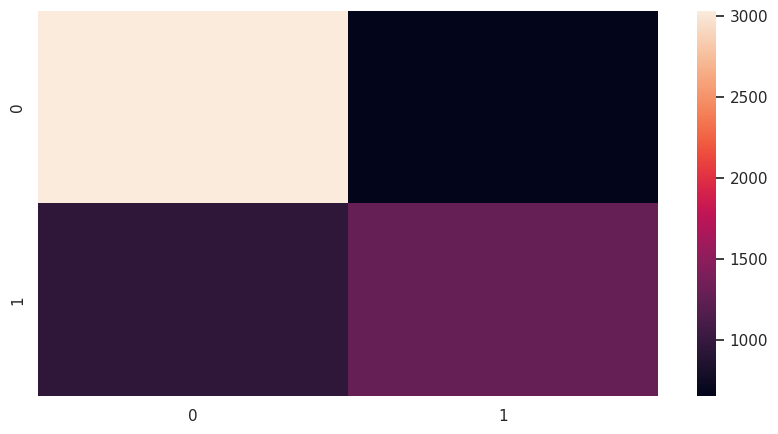

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report

model = LogisticRegression()

model.fit(x_train,y_train)

y_pred=model.predict(x_test)

cnf=confusion_matrix(y_test, y_pred)
cnf

sns.set(rc = {'figure.figsize':(10,5)})
sns.heatmap(cnf)

print(classification_report(y_test,y_pred))